In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [37]:
data = pd.read_csv('train.csv')

In [38]:
data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [39]:
data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [40]:
data= data.drop(['Cabin'], axis=1)
data= data.drop(['PassengerId'], axis=1)
data= data.drop(['Ticket'], axis=1)
data.columns.values

array(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'], dtype=object)

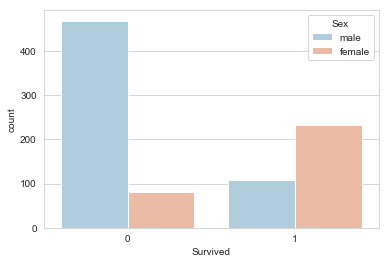

In [41]:
#count-plot of people survided 
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=data, palette='RdBu_r')

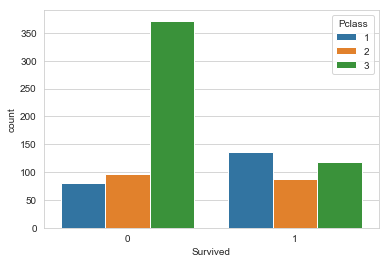

In [42]:
#no. of people who survived according to their Passenger Class
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=data)

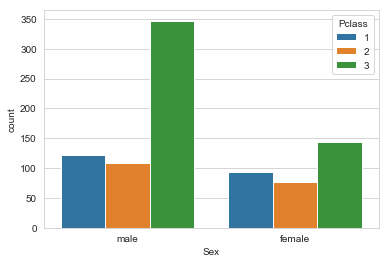

In [43]:
sns.set_style('whitegrid')
sns.countplot(x='Sex', hue='Pclass', data=data)

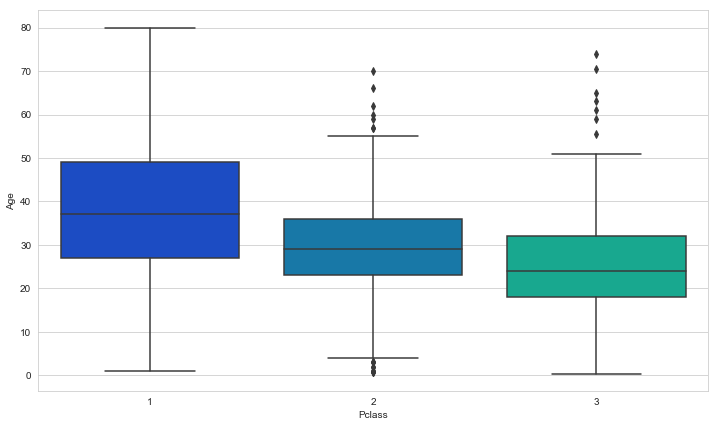

In [44]:
#boxplot with age on y-axis and Passenger class on x-axis.
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=data,palette='winter')

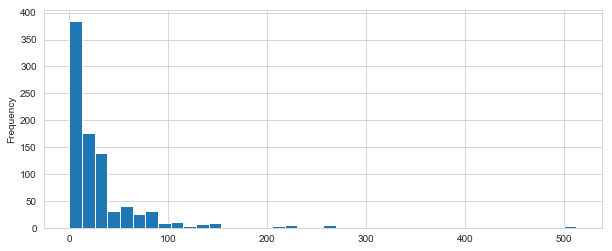

In [45]:
data['Fare'].plot.hist(bins=40, figsize=(10,4))

# EDA

In [46]:
data.isnull().sum().head()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
dtype: int64

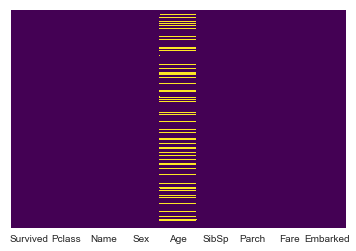

In [47]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Missing values in Age is replaced by the overall mean

In [48]:
data['Age'].fillna(int(np.mean(data['Age'])),inplace=True)

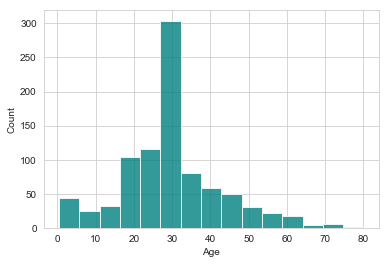

In [49]:
ax = data["Age"].hist(bins=15, color='teal', alpha=0.8)
ax.set(xlabel='Age', ylabel='Count')
plt.show()

In [50]:
sex = pd.get_dummies(data['Sex'],drop_first=True)
embark = pd.get_dummies(data['Embarked'],drop_first=True)

In [51]:
#drop the sex,embarked,name and tickets columns
data.drop(['Sex','Embarked','Name'],axis=1,inplace=True)
#concatenate new sex and embark column to our train dataframe
data = pd.concat([data,sex,embark],axis=1)
#check the head of dataframe
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


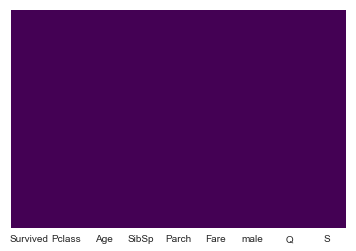

In [52]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [53]:
cols=['Pclass', 'Age','SibSp', 'Parch', 'Fare', 'male', 'Q','S']

In [54]:
X=data[cols]
y=data['Survived']

In [55]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.495707
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.256     
Dependent Variable: Survived         AIC:              899.3502  
Date:               2019-09-16 19:11 BIC:              937.6890  
No. Observations:   891              Log-Likelihood:   -441.68   
Df Model:           7                LL-Null:          -593.33   
Df Residuals:       883              LLR p-value:      1.1910e-61
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
Pclass    0.0352     0.0858     0.4105   0.6814   -0.1329    0.2034
Age       0.0045     0.0058     0.7725   0.4398   -0.0069 

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived',axis=1), 
           data['Survived'], test_size=0.30, 
            random_state=101)

# Training & Predicting

In [57]:
from sklearn.linear_model import LogisticRegression
#create an instance and fit the model 
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/Users/vkb/Desktop/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [58]:
#predictions
predictions = logmodel.predict(X_test)

In [59]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       154
           1       0.79      0.65      0.71       114

   micro avg       0.78      0.78      0.78       268
   macro avg       0.78      0.76      0.76       268
weighted avg       0.78      0.78      0.77       268

[[134  20]
 [ 40  74]]
0.7761194029850746


Classification Report:
The classification report displays the Precision, Recall , F1 and Support scores for the model.
Precision score means the the level up-to which the prediction made by the model is precise. The precision for survived is 0.79 and for not survived is 0.77.
Recall is the amount up-to which the model can predict the outcome. Recall for survived is 0.87 and for not survived is 0.65. F1 and Support scores are the amount of data tested for the predictions. 
Confusion matrix:
Confusion matrix is a table which describes the performance of a prediction model. A confusion matrix contains the actual values and predicted values. we can use these values to calculate the accuracy score of the model.

# Model Evaluation

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       154
           1       0.79      0.65      0.71       114

   micro avg       0.78      0.78      0.78       268
   macro avg       0.78      0.76      0.76       268
weighted avg       0.78      0.78      0.77       268



In [61]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

[[134  20]
 [ 40  74]]


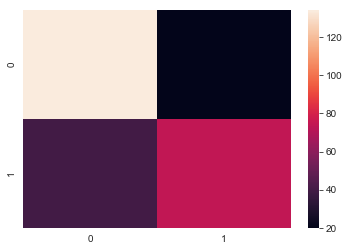

In [62]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,predictions)))
plt.show()

From our confusion matrix we conclude that:
True positive: 134(We predicted a positive result and it was positive)
True negative: 74(We predicted a negative result and it was negative)
False positive: 20(We predicted a positive result and it was negative)
False negative: 40(We predicted a negative result and it was positive)
Accuracy = (TP+TN)/total
Accuracy = (134+74)/268 ~ 77.6%
Error Rate = (FP+FN)/total
Error rate = (20+40)/268 ~22.3%

In [63]:
# calculate precision and recall and f1 score
from sklearn.metrics import precision_score, recall_score, f1_score
print(" precision score : %.5f" % (precision_score(y_test.values, predictions)))
print(" recall score : %.5f" % (recall_score(y_test.values, predictions)))
print(" f1 score : %.5f" % (f1_score(y_test.values, predictions)))

 precision score : 0.78723
 recall score : 0.64912
 f1 score : 0.71154


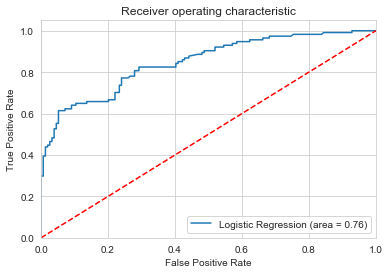

In [64]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Data split

In [65]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42) # create a %33 test data from orginal data

print("X train shape:",X_train.shape)
print("X test shape:",X_test.shape)
print("y train shape:",y_train.shape)
print("y test shape:",y_test.shape)

X train shape: (596, 8)
X test shape: (295, 8)
y train shape: (596,)
y test shape: (295,)


# NAIVE BAYES

In [66]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
print("Naive Bayes score",nb.score(X_test,y_test))
plt.show()

Naive Bayes score 0.8033898305084746


# DECISION TREE

In [67]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
print("Decision Tree Score",dt.score(X_test,y_test))

Decision Tree Score 0.752542372881356


# RANDOM FOREST

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, random_state=1)
rf.fit(X_train,y_train)
print("Random Forest Classification Score",rf.score(X_test,y_test))

Random Forest Classification Score 0.7966101694915254


# COMPARISON

In [69]:
print("Naive Bayes score :",nb.score(X_test,y_test)*100)
print("Decision Tree Score :",dt.score(X_test,y_test)*100)
print("Random Forest Classification Score :",rf.score(X_test,y_test)*100)

Naive Bayes score : 80.33898305084746
Decision Tree Score : 75.2542372881356
Random Forest Classification Score : 79.66101694915254
